In [1]:
from keras.datasets import mnist
from vae import VariationalAutoencoder
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

c:\users\vaibggup\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('Shapes :-')
print('x_train;', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

Shapes :-
x_train; (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
x_train = x_train.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)

x_test = x_test.astype('float32') / 255.
x_test = np.expand_dims(x_test, -1)

In [5]:
print('Shapes :-')
print('x_train;', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

Shapes :-
x_train; (60000, 28, 28, 1)
y_train: (60000,)
x_test: (10000, 28, 28, 1)
y_test: (10000,)


Encoder and Decoder Definition for Variational Autoencoder

In [6]:
autoencoder = VariationalAutoencoder()

In [7]:
autoencoder.vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
model_2 (Model)              (None, 2)                 106116    
_________________________________________________________________
model_3 (Model)              (None, 28, 28, 1)         102661    
Total params: 208,777
Trainable params: 208,007
Non-trainable params: 770
_________________________________________________________________


In [8]:
autoencoder.compile(learning_rate=5e-4, r_loss_factor=1000)

In [15]:
autoencoder.train(x_train, batch_size=32, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1601s 27ms/step - loss: 68.1590 - vae_r_loss: 64.4742 - vae_kl_loss: 3.6848
Epoch 2/20
60000/60000 [==============================] - 1603s 27ms/step - loss: 68.1265 - vae_r_loss: 64.4388 - vae_kl_loss: 3.6877
Epoch 3/20
29536/60000 [=============>................] - ETA: 15:11 - loss: 67.8615 - vae_r_loss: 64.1553 - vae_kl_loss: 3.7061

KeyboardInterrupt: 

In [10]:
num_pts_to_show = 5000
random_indexes = np.random.choice( range(len(x_test)), num_pts_to_show )

input_imgs = x_test[random_indexes]
labels = y_test[random_indexes]

pred_coords = autoencoder.encoder.predict(input_imgs)

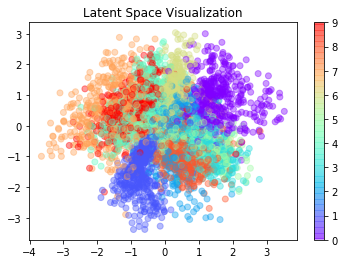

In [11]:
fig = plt.figure()

plt.title('Latent Space Visualization')
plt.scatter(pred_coords[:, 0], pred_coords[:, 1], c=labels, cmap='rainbow', alpha=0.4)
plt.colorbar()
plt.show()

plt.close(fig)

In [12]:
num_digits_to_show = 10

random_coords = np.random.normal(loc=0.0, scale=15, size=(num_digits_to_show, 2))
generated_digit_imgs = autoencoder.decoder.predict(random_coords)

generated_digit_imgs.shape

(10, 28, 28, 1)

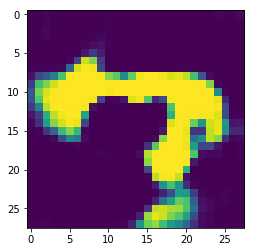

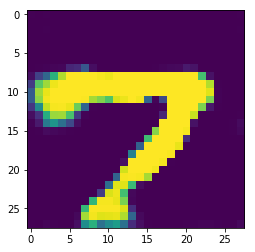

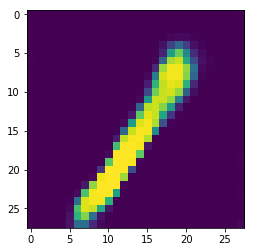

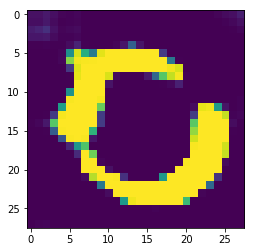

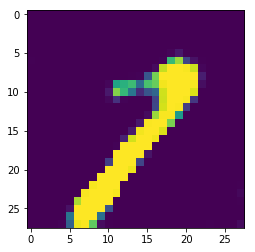

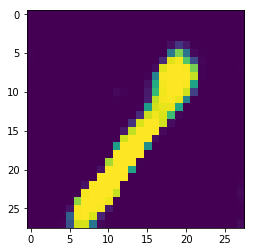

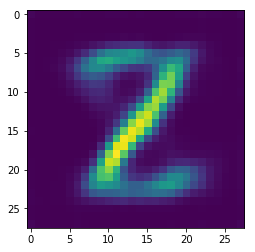

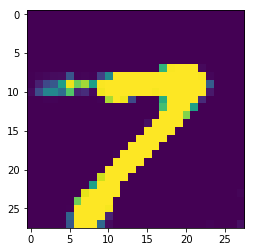

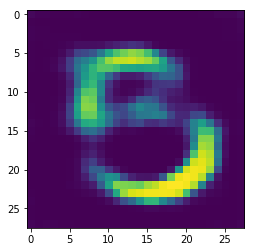

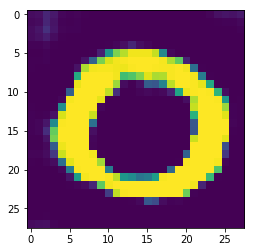

In [13]:
generated_digit_imgs = np.squeeze(generated_digit_imgs)

for digit in generated_digit_imgs:
    plt.imshow(digit)
    plt.show()